<a href="https://colab.research.google.com/github/chrisseub/ML-Practice-Rep/blob/main/EGG%20SIZE%20CLASSIFICATION%20MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

  IMPORT THE EGG QUALITY DATA

In [2]:
Egg_Traits = pd.read_excel('/content/main.xls')

#VIEWING THE DATA
print(Egg_Traits.head()) # Print the first few rows
Egg_Traits.shape


  STRAIN          AGE  EGG_WEIGHT   EGG_LENGTH  EGG_WIDTH YOLK_HEIGHT  \
0  BROWN  EARLY LAYER         52.5        5.75        4.0         1.8   
1  BROWN  EARLY LAYER         62.6        5.70        4.3           2   
2  BROWN  EARLY LAYER         61.0        5.50        4.3         1.8   
3  BROWN  EARLY LAYER         64.1        5.70        4.4         1.9   
4  BROWN  EARLY LAYER         53.9        5.60        4.0         2.2   

  YOLK_WIDTH ALB_HEIGHT  YOLK _ALB_WEIGHT   SHELL_WEIGTH  SHELL_THICKNESS  \
0        4.1        0.7               48.0           5.9             0.27   
1        4.2        0.8               54.8           7.7             0.35   
2          4          1               53.5           7.5             0.35   
3          4          1               55.7           7.4             0.29   
4          4       0.65               46.0           7.0             0.39   

   Haugh Unit  Shell surface area  Yolk Index  Shape Index Outcome  
0   84.390042           63.77

(300, 16)

ANALYSING THE DATA

In [3]:
Egg_Traits.describe() #For some descriptive statistics



,EGG_WEIGHT,EGG_LENGTH,EGG_WIDTH,YOLK _ALB_WEIGHT,SHELL_WEIGTH,SHELL_THICKNESS,Haugh Unit,Shell surface area,Yolk Index,Shape Index
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,299.000000,300.000000,296.000000,300.000000
mean,63.848667,5.800800,4.340500,55.607333,7.593667,0.323033,84.539822,72.483645,48.002424,75.555584
std,6.304399,0.306651,0.291033,5.840976,0.704686,0.042691,0.744175,4.739732,4.481038,5.981744
min,49.700000,5.100000,0.300000,43.000000,5.900000,0.200000,81.801110,61.505237,21.621622,5.263158
25%,59.200000,5.587500,4.200000,51.300000,7.100000,0.290000,84.057052,69.031801,45.238095,73.098388
50%,63.650000,5.800000,4.300000,55.500000,7.500000,0.330000,84.548793,72.414210,47.619048,75.545385
75%,68.600000,6.000000,4.500000,60.350000,8.025000,0.350000,85.045960,76.083555,50.166667,78.181818
max,78.900000,7.000000,4.900000,70.200000,9.900000,0.420000,86.421165,83.442576,61.764706,89.090909


In [4]:
Egg_Traits['Outcome'].value_counts()



,count
Outcome,
Large,229
Small,71


In [5]:
numeric_columns = Egg_Traits.select_dtypes(include=np.number).columns

# Calculate the mean for only numeric columns
Egg_Traits.groupby('Outcome')[numeric_columns].mean()

,EGG_WEIGHT,EGG_LENGTH,EGG_WIDTH,YOLK _ALB_WEIGHT,SHELL_WEIGTH,SHELL_THICKNESS,Haugh Unit,Shell surface area,Yolk Index,Shape Index
Outcome,,,,,,,,,,
Large,66.427948,5.890349,4.392140,57.916594,7.759825,0.317031,84.428646,74.443886,47.850931,74.856325
Small,55.529577,5.511972,4.173944,48.159155,7.057746,0.342394,84.896838,66.161177,48.510369,77.810941


In [6]:
Outcome_mapping = {'Small': 0, 'Large': 1}
# Apply the mapping to the 'Outcome' column
Egg_Traits['Outcome_Numeric'] = Egg_Traits['Outcome'].map(Outcome_mapping)
# You can now use the 'Outcome_Numeric' column for calculations
print(Egg_Traits.head())

#0 is for Small
#1 is for Large

  STRAIN          AGE  EGG_WEIGHT   EGG_LENGTH  EGG_WIDTH YOLK_HEIGHT  \
0  BROWN  EARLY LAYER         52.5        5.75        4.0         1.8   
1  BROWN  EARLY LAYER         62.6        5.70        4.3           2   
2  BROWN  EARLY LAYER         61.0        5.50        4.3         1.8   
3  BROWN  EARLY LAYER         64.1        5.70        4.4         1.9   
4  BROWN  EARLY LAYER         53.9        5.60        4.0         2.2   

  YOLK_WIDTH ALB_HEIGHT  YOLK _ALB_WEIGHT   SHELL_WEIGTH  SHELL_THICKNESS  \
0        4.1        0.7               48.0           5.9             0.27   
1        4.2        0.8               54.8           7.7             0.35   
2          4          1               53.5           7.5             0.35   
3          4          1               55.7           7.4             0.29   
4          4       0.65               46.0           7.0             0.39   

   Haugh Unit  Shell surface area  Yolk Index  Shape Index Outcome  \
0   84.390042           63.7

SEPERATING DATA AND LABELS

In [7]:
X = Egg_Traits.drop(columns=[Egg_Traits.columns[2], 'STRAIN', 'AGE', 'Outcome', 'Outcome_Numeric'], axis=1)
Y = Egg_Traits['Outcome_Numeric']
print(X)
print(Y)

     EGG_LENGTH  EGG_WIDTH YOLK_HEIGHT YOLK_WIDTH ALB_HEIGHT  \
0          5.75       4.00         1.8        4.1        0.7   
1          5.70       4.30           2        4.2        0.8   
2          5.50       4.30         1.8          4          1   
3          5.70       4.40         1.9          4          1   
4          5.60       4.00         2.2          4       0.65   
..          ...        ...         ...        ...        ...   
295        5.30       4.15        1.85        3.9        0.8   
296        5.65       4.25        2.05       3.95        0.8   
297        5.70       4.30         1.9        3.8        0.9   
298        5.60       4.20        1.75        3.8        0.8   
299        6.10       4.20         1.8          4        0.8   

     YOLK _ALB_WEIGHT   SHELL_WEIGTH  SHELL_THICKNESS  Haugh Unit  \
0                 48.0           5.9             0.27   84.390042   
1                 54.8           7.7             0.35   84.416908   
2                 53.5  

SPLITTING INTO TRAINING AND TEST DATA

TRANSFORMING DATA

ELIMINATING MISSING DATA

In [8]:
# Replace hyphens with NaN in the entire dataset
X = X.replace('-', np.nan)

# Convert object columns to numeric, coercing errors to NaN
for col in X.select_dtypes(include=['object']).columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Imputation should be done after splitting
imputer = SimpleImputer(strategy='mean')

# Fit and transform on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test)

# Create new DataFrames with the imputed values and original indices
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

/tmp/ipython-input-8-1787726750.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace('-', np.nan)


In [9]:
print(X.shape, X_train.shape, X_test.shape)

(300, 12) (240, 12) (60, 12)


MODEL TRAINING (LOGISTIC REGRESSION)

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

MAKING A PREDICTION

In [11]:
"""Features to be inputed are:
Egg length, Egg width,
Yolk height, Yolk width,
Albumin height, Yolk albumin weight,
Shell weight, Shell thickness,
Haugh unit, Shell surface area,
Yolk index, Shape index) accordingly"""



# Input data for prediction
EGG_data = (5.6, 4.1, 1.9, 4.1, 0.7, 44.6, 7.3, 0.27, 84.4, 63.9, 46.3, 73.2)
# Changing the egg data to numpy array
EGG_data_as_numpy_array = np.asarray(EGG_data)
# Reshape the array for a single prediction
EGG_data_reshaped = EGG_data_as_numpy_array.reshape(1, -1)

print("Prediction using Logistic Regression:")
prediction_lr = model.predict(EGG_data_reshaped)
print(prediction_lr)

if (prediction_lr[0] == 0):
  print('This egg is predicted as Small by Logistic Regression')
else:
  print('This egg is predicted as Large by Logistic Regression')

Prediction using Logistic Regression:
[0]
This egg is predicted as Small by Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


PERFORMANCE METRICS (LOGISTIC REGRESSION)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, classification_report

# Predictions on the test data
y_pred_lr = model.predict(X_test)

# Classification Metrics
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
precision_lr = precision_score(Y_test, y_pred_lr)
recall_lr = recall_score(Y_test, y_pred_lr)
f1_lr = f1_score(Y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Logistic Regression Precision: {precision_lr}")
print(f"Logistic Regression Recall: {recall_lr}")
print(f"Logistic Regression F1-score: {f1_lr}")

# Although not typical for classification
mse_lr = mean_squared_error(Y_test, y_pred_lr)
r2_lr = r2_score(Y_test, y_pred_lr)
print(f"Logistic Regression Mean Squared Error: {mse_lr}")
print(f"Logistic Regression R-squared: {r2_lr}")

print("\nLogistic Regression Classification Report:")
print(classification_report(Y_test, y_pred_lr))

Logistic Regression Accuracy: 0.95
Logistic Regression Precision: 1.0
Logistic Regression Recall: 0.9347826086956522
Logistic Regression F1-score: 0.9662921348314607
Logistic Regression Mean Squared Error: 0.05
Logistic Regression R-squared: 0.7204968944099378

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.93      0.97        46

    accuracy                           0.95        60
   macro avg       0.91      0.97      0.93        60
weighted avg       0.96      0.95      0.95        60



RANDOM FOREST MODEL

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)
y_pred


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

MAKING A PREDICTION

In [15]:
"""Features to be inputed are:
Egg length, Egg width,
Yolk height, Yolk width,
Albumin height, Yolk albumin weight,
Shell weight, Shell thickness,
Haugh unit, Shell surface area,
Yolk index, Shape index) accordingly"""

# Input data for prediction
EGG_data = (5.6, 4.1, 1.9, 4.1, 0.7, 44.6, 7.3, 0.27, 84.4, 63.9, 46.3, 73.2)
# Changing the egg data to numpy array
EGG_data_as_numpy_array = np.asarray(EGG_data)
# Reshape the array for a single prediction
EGG_data_reshaped = EGG_data_as_numpy_array.reshape(1, -1)

print("\nPrediction using Random Forest:")
single_prediction_rf = rf.predict(EGG_data_reshaped)
print(single_prediction_rf)

if single_prediction_rf[0] == 0:
    print('This egg is predicted as Small by Random Forest')
else:
    print('This egg is predicted as Large by Random Forest')


Prediction using Random Forest:
[0]
This egg is predicted as Small by Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


PERFORMANCE METRICS (RANDOM FOREST)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score

# Predictions on the test data
y_pred_rf = rf.predict(X_test)

# Classification Metrics
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
precision_rf = precision_score(Y_test, y_pred_rf)
recall_rf = recall_score(Y_test, y_pred_rf)
f1_rf = f1_score(Y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1-score: {f1_rf}")

# Although not typical for classification
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


print("\nRandom Forest Classification Report:")
print(classification_report(Y_test, y_pred_rf))

Random Forest Accuracy: 0.9833333333333333
Random Forest Precision: 1.0
Random Forest Recall: 0.9782608695652174
Random Forest F1-score: 0.989010989010989
Random Forest Mean Squared Error: 0.016666666666666666
Random Forest R-squared: 0.9068322981366459

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.98      0.99        46

    accuracy                           0.98        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



DECISION TREE FOR RF MODEL

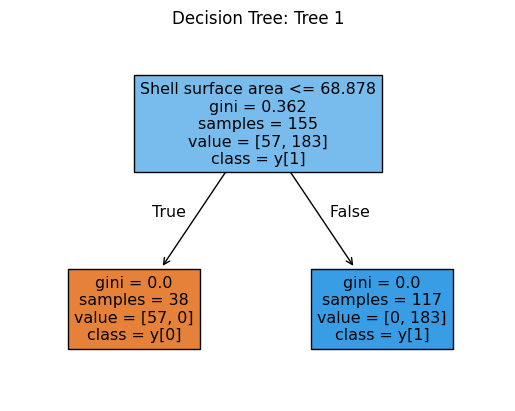

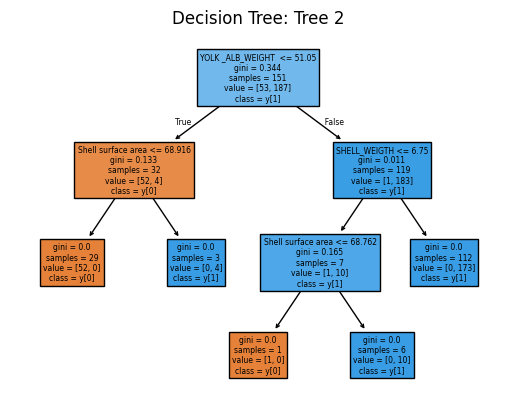

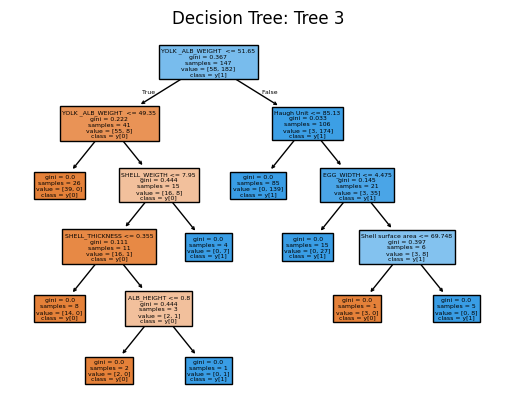

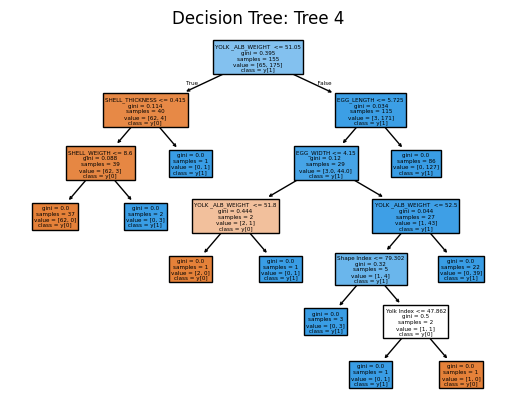

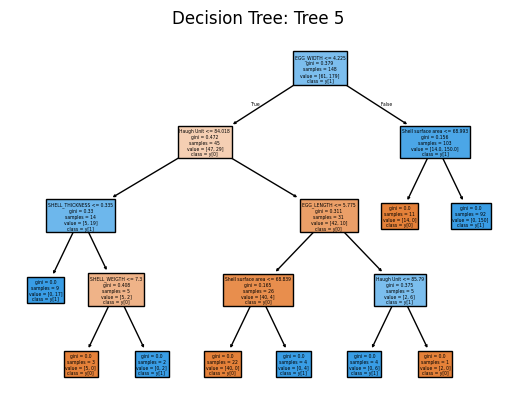

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
def plot_decision_tree(tree, tree_name):
    plot_tree(tree, filled = True, feature_names = X_train.columns, class_names = True)
    plt.title(f"Decision Tree: {tree_name}")
    plt.show()

for i in range(5):
    tree = rf.estimators_[i]
    plot_decision_tree(tree, f"Tree {i + 1}")


LINEAR REGRESSION MODEL

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lm = LinearRegression()
lm.fit(X_train, Y_train)

# Make predictions on the test set using the Linear Regression model
y_pred_lm = lm.predict(X_test)



Mean Squared Error: 0.09915948160317709
R-squared: 0.4456923388642273


MAKING A PREDICTION

In [19]:
"""Features to be inputed are:
Egg length, Egg width,
Yolk height, Yolk width,
Albumin height, Yolk albumin weight,
Shell weight, Shell thickness,
Haugh unit, Shell surface area,
Yolk index, Shape index) accordingly"""


# Input data for prediction (already defined in previous cells, but redefining for clarity)
EGG_data = (5.6, 4.1, 1.9, 4.1, 0.7, 44.6, 7.3, 0.27, 84.4, 63.9, 46.3, 73.2)
# Changing the egg data to numpy array
EGG_data_as_numpy_array = np.asarray(EGG_data)
# Reshape the array for a single prediction
EGG_data_reshaped = EGG_data_as_numpy_array.reshape(1, -1)

print("\nPrediction using Linear Regression:")
prediction_lm = lm.predict(EGG_data_reshaped) # 'lm' is the Linear Regression model
print(prediction_lm)

# For Linear Regression, the output is a continuous value.
# A threshold was applied to interpret it as a classification.
# For example, if the target variable is 0 or 1, a threshold of 0.5 could be used.
threshold = 0.5
if prediction_lm[0] < threshold:
    print(f'Based on a threshold of {threshold}, this egg is predicted as Small by Linear Regression')
else:
    print(f'Based on a threshold of {threshold}, this egg is predicted as Large by Linear Regression')


Prediction using Linear Regression:
[0.23454387]
Based on a threshold of 0.5, this egg is predicted as Small by Linear Regression


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


PERFORMANCE METRICS (LINEAR REGRESSION)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score

# Predictions on the test data
y_pred_lm = lm.predict(X_test)

# Regression Metrics
mse_lm = mean_squared_error(Y_test, y_pred_lm)
r2_lm = r2_score(Y_test, y_pred_lm)

print(f"Linear Regression Mean Squared Error: {mse_lm}")
print(f"Linear Regression R-squared: {r2_lm}")

# Apply the threshold to the Linear Regression predictions
threshold = 0.5
y_pred_lm_classified = (y_pred_lm > threshold).astype(int)

print("\nLinear Regression Classification Report (with 0.5 threshold):")
print(classification_report(Y_test, y_pred_lm_classified))
from sklearn.metrics import accuracy_score, precision_score

# Calculate Accuracy and Precision
accuracy_lm_classified = accuracy_score(Y_test, y_pred_lm_classified)
precision_lm_classified = precision_score(Y_test, y_pred_lm_classified)

print(f"Linear Regression Accuracy (with 0.5 threshold): {accuracy_lm_classified}")
print(f"Linear Regression Precision (with 0.5 threshold): {precision_lm_classified}")

Linear Regression Mean Squared Error: 0.09915948160317709
Linear Regression R-squared: 0.4456923388642273

Linear Regression Classification Report (with 0.5 threshold):
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.98      0.91      0.94        46

    accuracy                           0.92        60
   macro avg       0.87      0.92      0.89        60
weighted avg       0.93      0.92      0.92        60

Linear Regression Accuracy (with 0.5 threshold): 0.9166666666666666
Linear Regression Precision (with 0.5 threshold): 0.9767441860465116


SUPPORT VECTOR MACHINE (SVM) MODEL

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

# Define the parameter distribution for tuning
param_distributions = {
    'C': reciprocal(0.1, 100),
    'gamma': reciprocal(0.001, 1),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    svm,
    param_distributions,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,        # Number of cross-validation folds
    scoring='recall', # Optimize for recall of the minority class ('Small' is 0)
    random_state=42,
    n_jobs=-1    # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, Y_train)

# Print the best hyperparameters found
print("Best hyperparameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Get the best model
best_svm_model = random_search.best_estimator_

Best hyperparameters found by RandomizedSearchCV:
{'C': np.float64(1.3292918943162166), 'gamma': np.float64(0.711447600934342), 'kernel': 'poly'}


MAKING A PREDICTIONS

In [31]:
"""Features to be inputed are:
Egg length, Egg width,
Yolk height, Yolk width,
Albumin height, Yolk albumin weight,
Shell weight, Shell thickness,
Haugh unit, Shell surface area,
Yolk index, Shape index) accordingly"""


# Input data for prediction
EGG_data = (5.6, 4.1, 1.9, 4.1, 0.7, 44.6, 7.3, 0.27, 84.4, 63.9, 46.3, 73.2)
# Changing the egg data to numpy array
EGG_data_as_numpy_array = np.asarray(EGG_data)
# Reshape the array for a single prediction
EGG_data_reshaped = EGG_data_as_numpy_array.reshape(1, -1)

print("\nPrediction using SVM:")
prediction_svm = best_svm_model.predict(EGG_data_reshaped) # Use the best_svm_model
print(prediction_svm)

if (prediction_svm[0] == 0):
  print('This egg is predicted as Small by SVM')
else:
  print('This egg is predicted as Large by SVM')


Prediction using SVM:
[0]
This egg is predicted as Small by SVM


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


PERFORMANCE METRICS (SVM)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set with the best model
y_pred_best_svm = best_svm_model.predict(X_test)

# Evaluate the best SVM model using classification metrics
print("Performance metrics for the best SVM model:")
accuracy_best_svm = accuracy_score(Y_test, y_pred_best_svm)
precision_best_svm = precision_score(Y_test, y_pred_best_svm)
recall_best_svm = recall_score(Y_test, y_pred_best_svm)
f1_best_svm = f1_score(Y_test, y_pred_best_svm)

print(f"Best SVM Accuracy: {accuracy_best_svm}")
print(f"Best SVM Precision: {precision_best_svm}")
print(f"Best SVM Recall: {recall_best_svm}")
print(f"Best SVM F1-score: {f1_best_svm}")

print("\nClassification Report for the best SVM model:")
print(classification_report(Y_test, y_pred_best_svm))

Performance metrics for the best SVM model:
Best SVM Accuracy: 0.95
Best SVM Precision: 1.0
Best SVM Recall: 0.9347826086956522
Best SVM F1-score: 0.9662921348314607

Classification Report for the best SVM model:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.93      0.97        46

    accuracy                           0.95        60
   macro avg       0.91      0.97      0.93        60
weighted avg       0.96      0.95      0.95        60

